# TensorFlow & Keras

## Simple Example

This introduction begins with building a neural network that classifies handrwritten digits. Then we train and evaluate the model accuracy.

In [31]:
#
# Dependencies
#

import tensorflow as tf

#
# Dataset
#

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#
# Dataset Pre-processing
#

# Scale values to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#
# Model
#

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
# Training
#

model.fit(x_train, y_train, epochs=5)

#
# Evaluation
#

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2922 - accuracy: 0.9154
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1447 - accuracy: 0.9576
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1083 - accuracy: 0.9670
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0870 - accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0747 - accuracy: 0.9768
10000/1 - 0s - loss: 0.0394 - accuracy: 0.9766


[0.07807780883975793, 0.9766]

## Keras Principles

- User friendliness. Keras is an API designed for human beings, not machines. It puts user experience front and center. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.

- Modularity. A model is understood as a sequence or a graph of standalone, fully configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions and regularization schemes are all standalone modules that you can combine to create new models.

- Easy extensibility. New modules are simple to add (as new classes and functions), and existing modules provide ample examples. To be able to easily create new modules allows for total expressiveness, making Keras suitable for advanced research.

- Work with Python. Models are described in Python code, which is compact, easier to debug, and allows for ease of extensibility.

## Classify Images of Clothing

This next example trains a model to classify images of clothing using the Fashion MNIST dataset. The Fashion MNIST is an introductory dataset similar to the classic MNIST dataset.

Loading the dataset returns four NumPy arrays. The first pair are features and labels for the training set. The second pair are features and labels for the testing set. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

In [1]:
#
# Dependencies
#

import tensorflow as tf
from tensorflow import keras
from tensorboard import notebook
import numpy as np
import matplotlib.pyplot as plt
import datetime, os

print(tf.__version__)

# Load the TensorBoard notebook extension
%load_ext tensorboard

#
# Dataset
#

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#
# Constants
#

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#
# Data Introspection
#

print('train_images.shape', train_images.shape)
print('len(train_labels)', len(train_labels))
print('train_labels', train_labels)
print('test_images.shape', test_images.shape)
print('len(test_labels)', len(test_labels))

2.0.0
train_images.shape (60000, 28, 28)
len(train_labels) 60000
train_labels [9 0 0 ... 3 0 5]
test_images.shape (10000, 28, 28)
len(test_labels) 10000


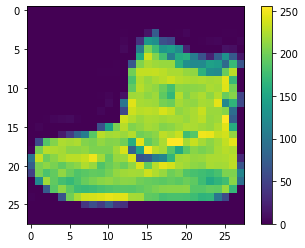

In [2]:
#
# Dataset Introspection
#

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
#
# Dataset Pre-processing
#

# Scale values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

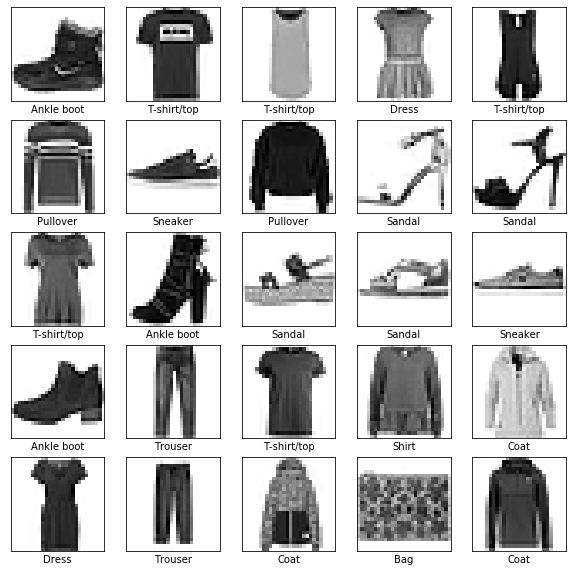

In [4]:
#
# Dataset Introspection
#

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

You build a neural network model by configuring the layers. Layers are the basic building block of neural networks. Layers develop some understanding of the input data provided. Hopefully, this understanding is meaningful. Most deep learning is chaining simple layers together.

In [5]:
#
# Model
#

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [6]:
#
# Compile Model
#

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Before model training we need to set a few hyperparameters. Above we set the following:

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [7]:
# Start TensorBoard to monitor progress
%tensorboard --logdir logs

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])

Reusing TensorBoard on port 6007 (pid 5257), started 0:15:12 ago. (Use '!kill 5257' to kill it.)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4960 - accuracy: 0.8269
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3707 - accuracy: 0.8662
Epoch 3/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3358 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3108 - accuracy: 0.8865
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2933 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2789 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2668 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2554 - accuracy: 0.9057
Epoch 9/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2459 - accuracy: 0.9081
Epoch 10/10
6

In [8]:
#
# Evaluate Accuracy
#

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2297 - accuracy: 0.8856

Test accuracy: 0.8856


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

In [9]:
#
# Make Predictions
#

predictions = model.predict(test_images)

print('predictions[0]', predictions[0])
print('np.argmax(predictions[0])', np.argmax(predictions[0]))
print('test_labels[0]', test_labels[0])

predictions[0] [8.2941696e-08 1.1679031e-09 2.1807238e-09 3.3767383e-10 4.4081752e-09
 1.6631848e-03 8.1533166e-08 5.9917406e-03 3.6949750e-09 9.9234492e-01]
np.argmax(predictions[0]) 9
test_labels[0] 9


Visualize predictions using a graph.

In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

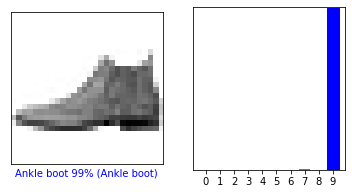

In [11]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

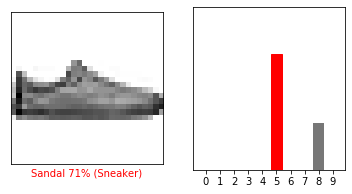

In [12]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

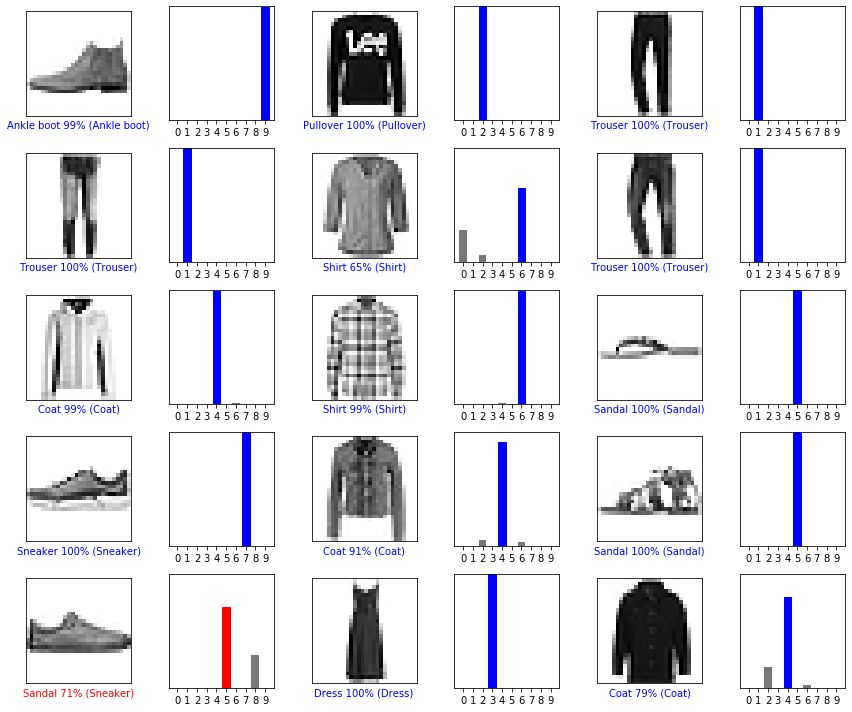

In [14]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[2.39472683e-05 1.96875988e-10 9.99125659e-01 1.56602145e-08
  4.63700970e-04 9.70283298e-11 3.86705186e-04 1.03811547e-20
  9.21506274e-11 1.02439154e-10]]


2

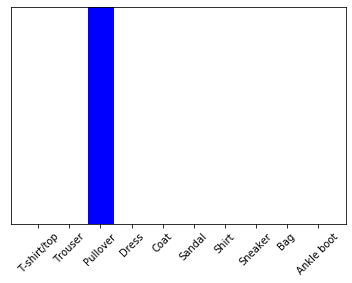

In [15]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])